In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_explore = pd.read_csv('../data/processed/clean_data.csv')
df_explore.set_index('link', inplace=True)

#Filtering data
df_explore = df_explore[(df_explore['price'] < 210000000) & (df_explore['price'] > 10000000) ]
print(df_explore.head())

                                                    bathrooms  bedrooms  \
link                                                                      
http://www.metrocuadrado.com/proyecto/entreverd...        0.0       0.0   
http://www.metrocuadrado.com/proyecto/portal-de...        0.0       0.0   
https://www.fincaraiz.com.co/apartamento-en-ven...        2.0       3.0   
https://www.fincaraiz.com.co/apartamento-en-ven...        3.0       3.0   
https://www.fincaraiz.com.co/la-gran-via-condom...        2.0       3.0   

                                                    floor_location  \
link                                                                 
http://www.metrocuadrado.com/proyecto/entreverd...             1.0   
http://www.metrocuadrado.com/proyecto/portal-de...             1.0   
https://www.fincaraiz.com.co/apartamento-en-ven...             0.0   
https://www.fincaraiz.com.co/apartamento-en-ven...             0.0   
https://www.fincaraiz.com.co/la-gran-via-condom...    

/home/paolagc/Documents/projects/house-scooby/notebooks/env/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/paolagc/Documents/projects/house-scooby/notebooks/env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/paolagc/Documents/projects/house-scooby/notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result 

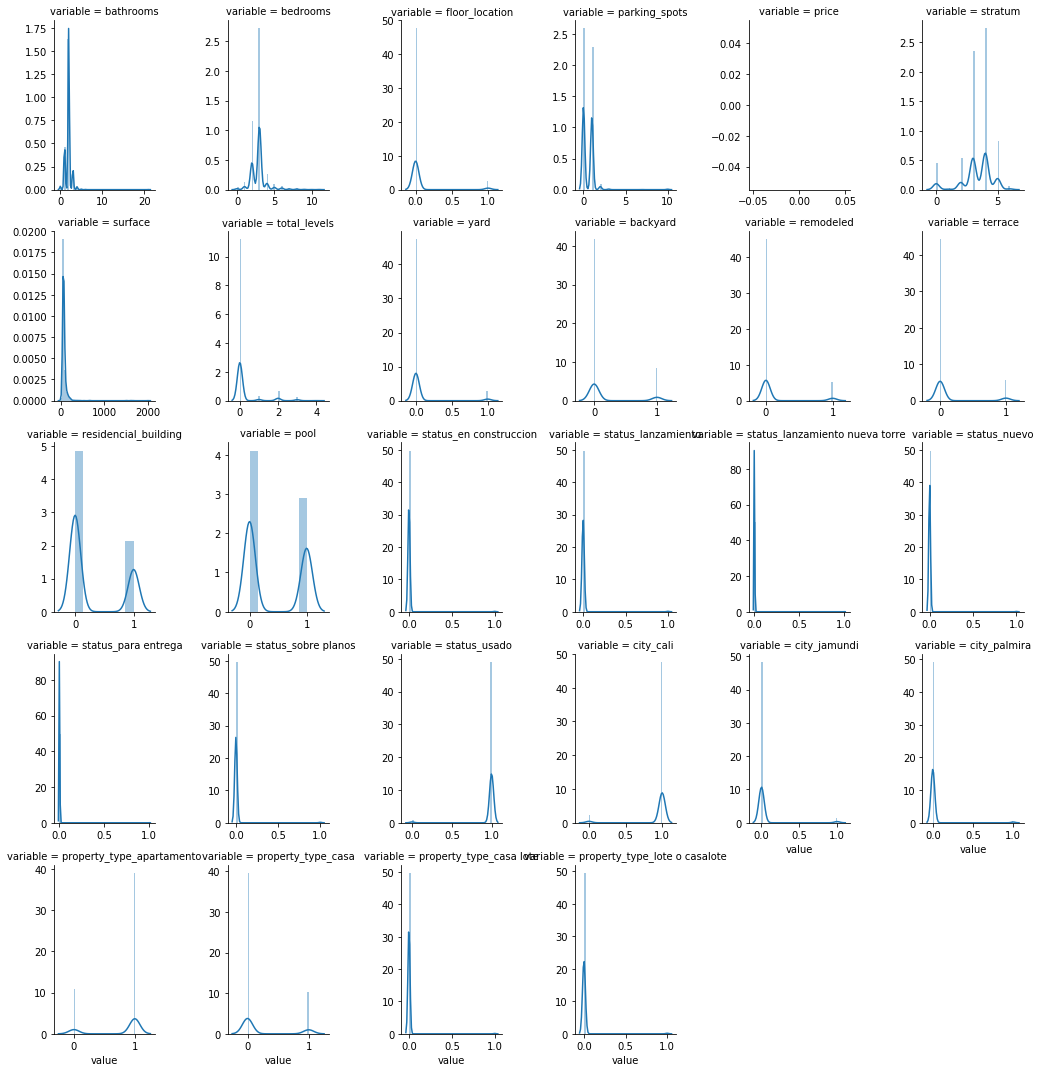

In [3]:
# visualize the distribution of each numerical feature
temp = pd.melt(df_explore.drop('price',axis=1), value_vars=df_explore.columns.values)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=6 , size=3.0, 
                     aspect=0.8,sharex=False, sharey=False)
grid.map(sns.distplot, "value")
plt.show()

['bathrooms' 'bedrooms' 'floor_location' 'parking_spots' 'price' 'stratum'
 'surface' 'total_levels' 'yard' 'backyard' 'remodeled' 'terrace'
 'residencial_building' 'pool' 'status_en construccion'
 'status_lanzamiento' 'status_lanzamiento nueva torre' 'status_nuevo'
 'status_para entrega' 'status_sobre planos' 'status_usado' 'city_cali'
 'city_jamundi' 'city_palmira' 'property_type_apartamento'
 'property_type_casa' 'property_type_casa lote'
 'property_type_lote o casalote']


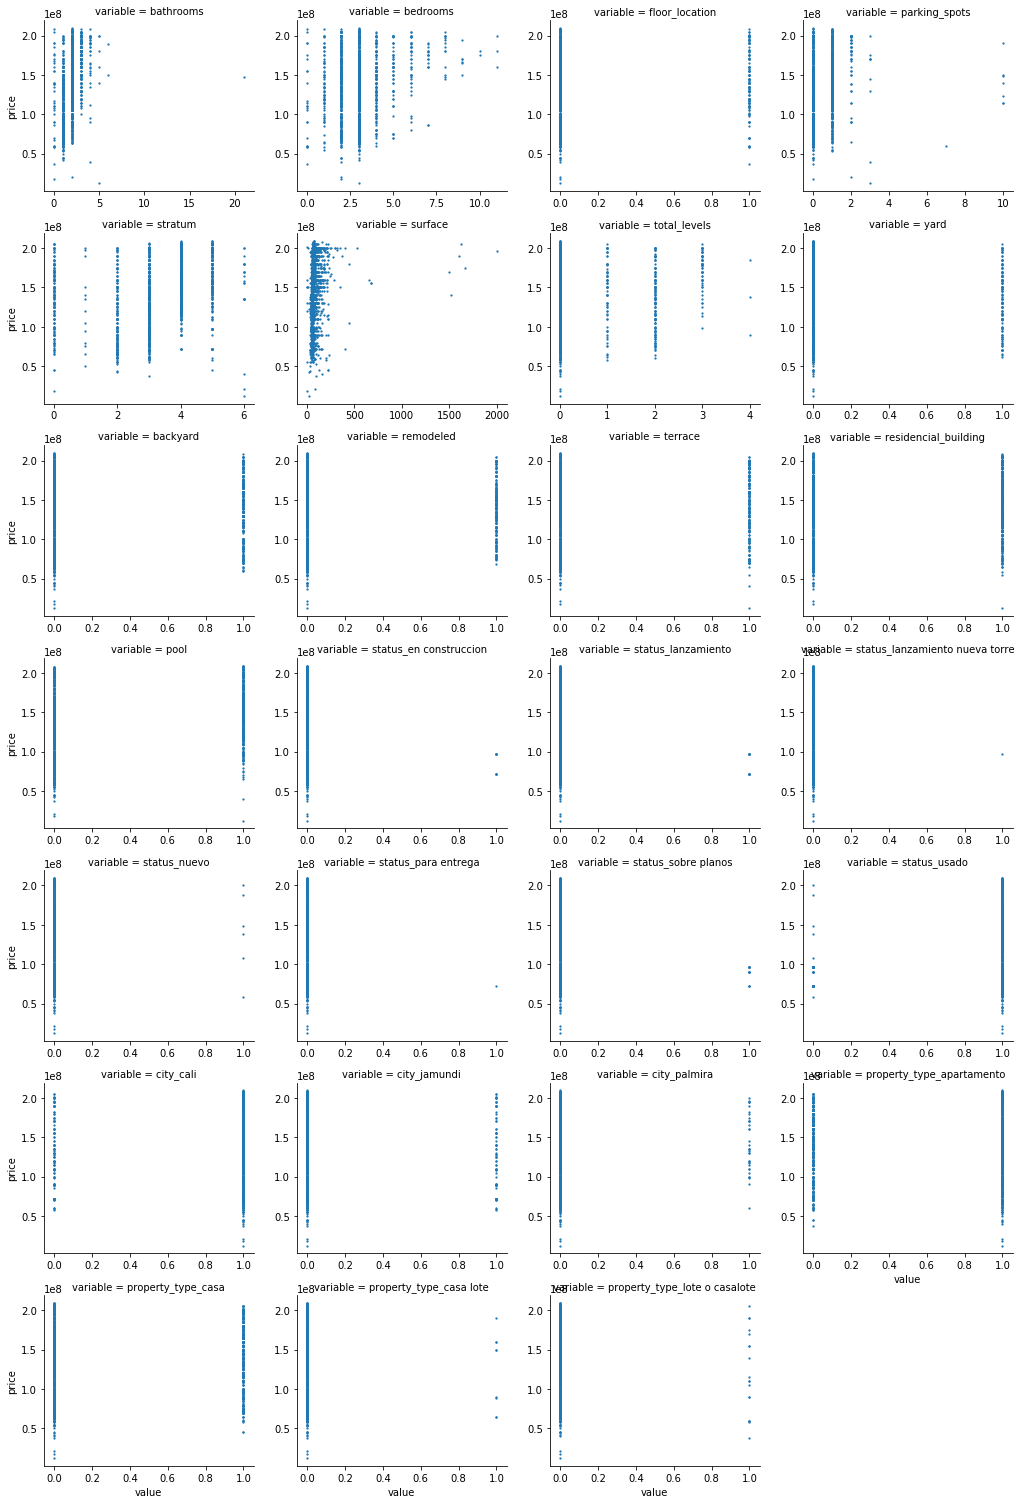

In [4]:
# scatter plots
print(df_explore.columns.values)
temp = pd.melt(df_explore, id_vars=['price'])
grid = sns.FacetGrid(temp, col="variable",  col_wrap=4 , size=3.0, 
                     aspect=1.2,sharex=False, sharey=False)
grid.map(plt.scatter, "value",'price',s=1.5)
plt.show()

In [5]:
df_explore['price_square_root'] = df_explore.apply(lambda row: row['price'] / row['surface'], axis=1)
print(df_explore.head())


                                                    bathrooms  bedrooms  \
link                                                                      
http://www.metrocuadrado.com/proyecto/entreverd...        0.0       0.0   
http://www.metrocuadrado.com/proyecto/portal-de...        0.0       0.0   
https://www.fincaraiz.com.co/apartamento-en-ven...        2.0       3.0   
https://www.fincaraiz.com.co/apartamento-en-ven...        3.0       3.0   
https://www.fincaraiz.com.co/la-gran-via-condom...        2.0       3.0   

                                                    floor_location  \
link                                                                 
http://www.metrocuadrado.com/proyecto/entreverd...             1.0   
http://www.metrocuadrado.com/proyecto/portal-de...             1.0   
https://www.fincaraiz.com.co/apartamento-en-ven...             0.0   
https://www.fincaraiz.com.co/apartamento-en-ven...             0.0   
https://www.fincaraiz.com.co/la-gran-via-condom...    

In [6]:
df_explore.sort_values(['price_square_root', 'surface', 'backyard', 'terrace'], ascending=[1, 0, 0, 0], inplace=True)
print(df_explore.index.values[0:100])


['http://www.metrocuadrado.com/inmueble/venta-lote-o-casalote-jamundi/MC2235700'
 'http://www.metrocuadrado.com/inmueble/venta-casa-palmira-3-habitaciones-1-banos/242-4442685'
 'http://www.metrocuadrado.com/inmueble/venta-lote-o-casalote-jamundi/9089-809'
 'http://www.metrocuadrado.com/inmueble/venta-lote-o-casalote-palmira/2361-83138'
 'http://www.metrocuadrado.com/inmueble/venta-lote-o-casalote-palmira/860-7430'
 'http://www.metrocuadrado.com/inmueble/venta-lote-o-casalote-jamundi/4948-793419'
 'https://www.vivendo.co/proyectos/jamundi/praderas-de-verde-horizonte'
 'https://fincaraiz.elpais.com.co/aviso/casas-venta-cali-norte-golondrinas-ag1199897'
 'https://fincaraiz.elpais.com.co/aviso/casas-venta-cali-norte-golondrinas-vp1200932-Akgrupoinmobiliario'
 'http://www.metrocuadrado.com/inmueble/venta-lote-o-casalote-jamundi/9089-765'
 'http://www.metrocuadrado.com/inmueble/venta-lote-o-casalote-jamundi/860-7747'
 'https://www.fincaraiz.com.co/apartamento-en-venta/cali/juanambu-det-38776